# An example of p-value calculation
Somewhat inspired by [this](http://onlinecourses.science.psu.edu/statprogram/node/139).

In [63]:
import numpy as np
import pandas as pd

%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

# we wouldn't actually use seaborn
# but it makes the plots nicer.
import seaborn as sns
sns.set(color_codes=True)

An engineer measured the Brinell hardness of 25 pieces of ductile iron that were subcritically annealed. The resulting data were:

170, 167, 174, 179, 179
156, 163, 156, 187, 156
183, 179, 174, 179, 170
156, 187, 179, 183, 174
187, 167, 159, 170, 179

In [120]:
data = np.array([170, 167, 174, 179, 179,
                          156, 163, 156, 187, 156,
                          183, 179, 174, 179, 170,
                          156, 187, 179, 183, 174,
                          187, 167, 159, 170, 179])

hardness = pd.Series(data, name='Brinell hardness')

He then looked at the summary statistics:

In [19]:
hardness.describe()

count     25.00000
mean     172.52000
std       10.31229
min      156.00000
25%      167.00000
50%      174.00000
75%      179.00000
max      187.00000
Name: Brinell hardness, dtype: float64

And plotted the distribution:

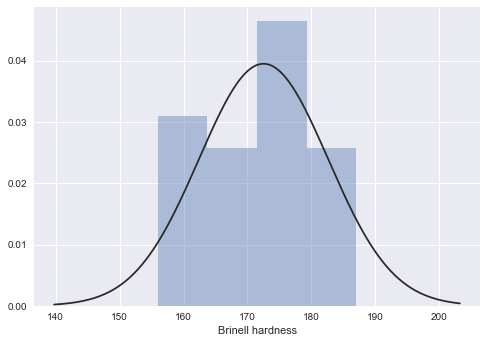

In [54]:
sns.distplot(hardness, kde=False, fit=norm)

The engineer hypothesized that the mean Brinell hardness of all such ductile iron pieces is greater than 175. Therefore, he was interested in testing the hypotheses:

$H_0: \mu = 170$

$H_1: \mu > 170$

The engineer though about the conditions: 
1. The metals that he checked were all different from each other (independent)
2. His sample size was 25 - a bit small, size of 30 was better.

In spite his sample size being a little small, the engineer decided to proceed assuming that sampling distribution will be nearly normal with:
$$ \bar{x} = N(\mu = 170, SE = \frac{s}{\sqrt{n}}) $$

What the engineer was interested in knowing is (the p-score): if the averege Brindell hardness of all metals is 170 ($H_0$), what is the probabilty of observing a sample mean of 172.52?

$$P(\bar{x}=172.52 | \mu = 170)?$$

He calculated the standard error of the sampling distribution:

In [83]:
s = hardness.std()
n = hardness.size
se = s / np.sqrt(n)
mu = 170
x = hardness.mean()
print('The standard error is: {:0.4}'.format(se))

The standard error is: 2.062


He now drew the sampling distribution:

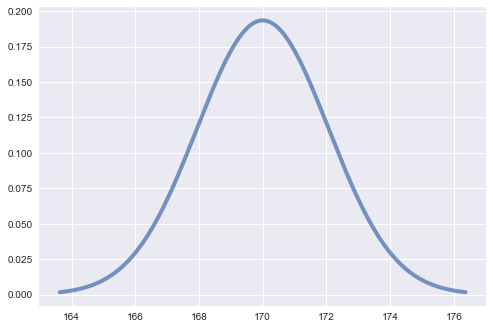

In [68]:
# between 0.001 and 0.999 quartile
series_range = np.arange(norm.ppf(0.001, loc=mu, scale=se), norm.ppf(0.999, loc=mu, scale=se), 0.01)
sample_dist = norm.pdf(series_range, loc=mu, scale=se)

samp_d = pd.Series(sample_dist, 
                   name='sampling distribution')

plt.plot(series_range, samp_d,'b-',
         linewidth=4.0, 
         alpha=0.75)

What is the probability of observing a value of $\bar{x}=172.52$?

The engineer than calculated the area:

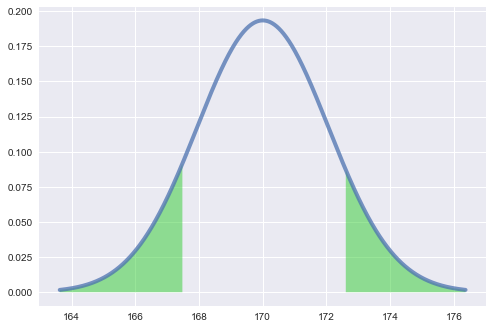

In [97]:
plt.plot(series_range, samp_d,'b-',
         linewidth=4.0, 
         alpha=0.75)

plt.fill_between(series_range, 0, samp_d, 
                 where= (series_range < (2*mu - x)) + (series_range > 172.6), 
                 facecolor='limegreen', alpha=0.5)

The lower are under the the curve is:

In [109]:
p_lower = norm.cdf(2*mu - x, loc=mu, scale=se)
print('P - lower green area: {:0.5}'.format(p_lower))

P - lower green area: 0.11088


And since the probabilty is symmetric, this total area in green is:

In [119]:
p_value = 2 * p_lower
print('The p-value is:      {:0.5}'.format(p_total))
print('which corresponds to {:0.2f}%'.format(p*100))

The p-value is:      0.22177
which corresponds to 22.18%


The engineer concluded that there is a good probabilty to obtain his sample mean of 172.52 and this is not a sufficicnet evidence to reject his null hypothesis. 

___
A shorter version, which estimates the Z-value

In [124]:
z = (x-mu)/se # calcualate z* value
p_value = (1 - norm.cdf(z)) * 2 # the area above the z* value and below the -z* value
print('The p-value is:      {:0.5}'.format(p_value))

The p-value is:      0.22177
